In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from data_stats import read_unicef_data, check_missing_values, clean_unicef_data
csv_file = 'UNICEF_IND.csv'

# 1. Read Dataset 
df = read_unicef_data(csv_file)

# 2. Check for missing values 
missing_values = check_missing_values(csv_file)
print("Missing Values:\n", missing_values)

# 3. Clean the dataset 
cleaned_df = clean_unicef_data(df)

# Display the first few rows of the cleaned DataFrame to verify the result
cleaned_df.head()

Missing Values:
 DATAFLOW                            0
REF_AREA:Geographic area            0
INDICATOR:Indicator                 0
SEX:Sex                             0
WEALTH_QUINTILE:Wealth Quintile     0
TIME_PERIOD:Time period             0
OBS_VALUE:Observation Value         0
DATA_SOURCE:Data Source             0
COUNTRY_NOTES:Country notes         0
UNIT_MEASURE:Unit of measure        0
REF_PERIOD:Reference Period        52
LOWER_BOUND:Lower Bound             0
UPPER_BOUND:Upper Bound             0
OBS_STATUS:Observation Status       0
dtype: int64


,Year,Neonatal_Mortality_Rate,Sex,Wealth_Quintile,Indicator,Country_Notes,Unit_Measure,Lower_Bound,Upper_Bound
0,1970,84.949849,_T: Total,_T: Total,CME_MRM0: Neonatal mortality rate,The most recent national official estimate of ...,"D_PER_1000_B: Deaths per 1,000 live births",78.371977,92.136310
1,1971,84.217018,_T: Total,_T: Total,CME_MRM0: Neonatal mortality rate,The most recent national official estimate of ...,"D_PER_1000_B: Deaths per 1,000 live births",78.045814,91.113473
2,1972,83.481996,_T: Total,_T: Total,CME_MRM0: Neonatal mortality rate,The most recent national official estimate of ...,"D_PER_1000_B: Deaths per 1,000 live births",77.508706,90.030670
3,1973,82.564652,_T: Total,_T: Total,CME_MRM0: Neonatal mortality rate,The most recent national official estimate of ...,"D_PER_1000_B: Deaths per 1,000 live births",76.778730,88.917560
4,1974,81.527559,_T: Total,_T: Total,CME_MRM0: Neonatal mortality rate,The most recent national official estimate of ...,"D_PER_1000_B: Deaths per 1,000 live births",75.995238,87.594828


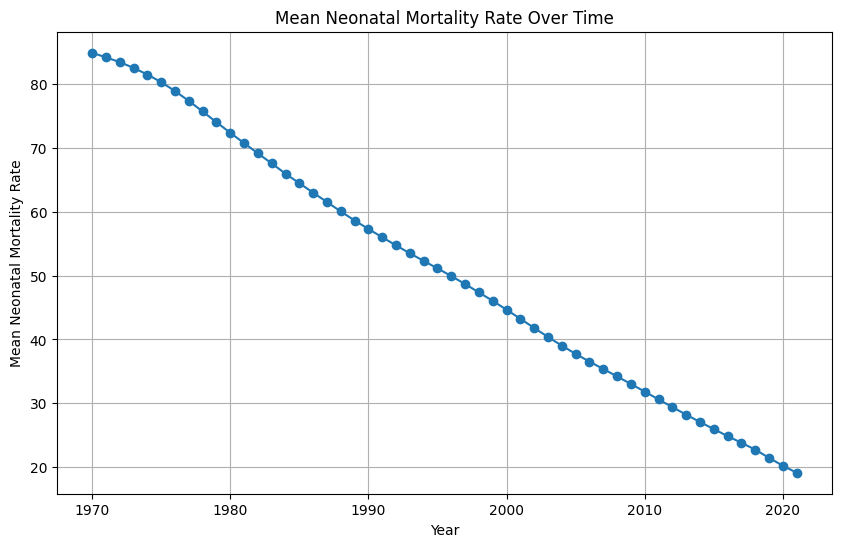

In [3]:
# Group data by year and calculate the mean of 'Neonatal_Mortality_Rate' for each year
mean_neonatal_mortality = cleaned_df.groupby('Year')['Neonatal_Mortality_Rate'].mean()

# Plot the mean neonatal mortality rate over time
plt.figure(figsize=(10, 6))
plt.plot(mean_neonatal_mortality.index, mean_neonatal_mortality.values, marker='o', linestyle='-')
plt.title('Mean Neonatal Mortality Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Neonatal Mortality Rate')
plt.grid(True)
plt.show()

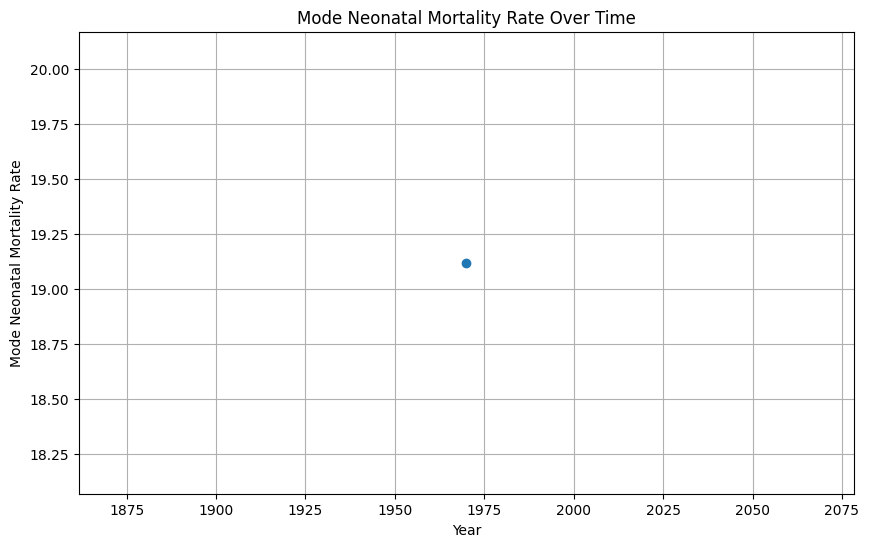

In [4]:
cleaned_df['Year'] = pd.to_datetime(cleaned_df['Year'], errors='coerce')

# Group data by year and calculate the mode of 'Neonatal_Mortality_Rate' for each year
mode_neonatal_mortality = cleaned_df.groupby(cleaned_df['Year'].dt.year)['Neonatal_Mortality_Rate'].agg(lambda x: x.mode().iloc[0])

# Plot the mode neonatal mortality rate over time
plt.figure(figsize=(10, 6))
plt.plot(mode_neonatal_mortality.index, mode_neonatal_mortality.values, marker='o', linestyle='-')
plt.title('Mode Neonatal Mortality Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Mode Neonatal Mortality Rate')
plt.grid(True)
plt.show()

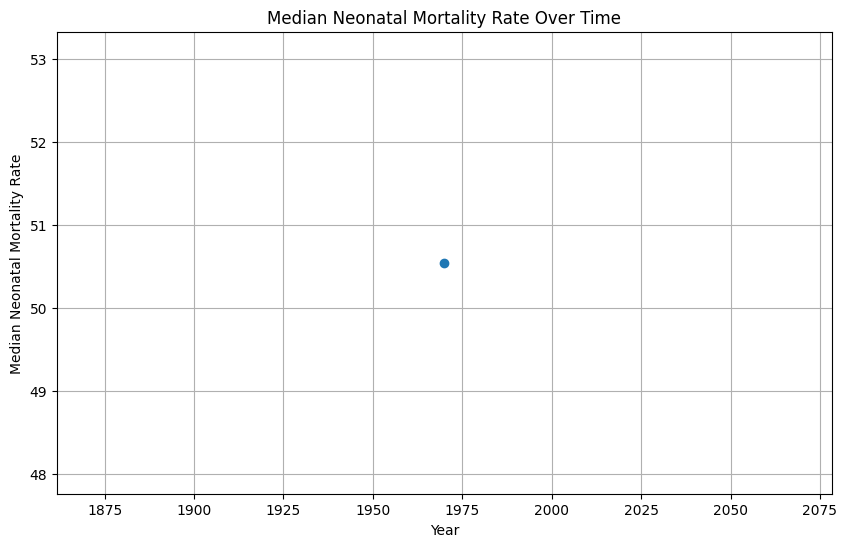

In [5]:
cleaned_df['Year'] = pd.to_datetime(cleaned_df['Year'], errors='coerce')

# Group data by year and calculate the median of 'Neonatal_Mortality_Rate' for each year
median_neonatal_mortality = cleaned_df.groupby(cleaned_df['Year'].dt.year)['Neonatal_Mortality_Rate'].median()

# Plot the median neonatal mortality rate over time
plt.figure(figsize=(10, 6))
plt.plot(median_neonatal_mortality.index, median_neonatal_mortality.values, marker='o', linestyle='-')
plt.title('Median Neonatal Mortality Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Median Neonatal Mortality Rate')
plt.grid(True)
plt.show()